<a href="https://colab.research.google.com/github/Jacqy-coder/Credit-default-/blob/main/credit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.0/679.0 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=528920a1a0145d66f667b8d8c641ea196bced44f205d101c449cd7b14646f4ec
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.1
    Uninstalling scipy-1.16.1:
     

In [2]:
!apt-get install -y wkhtmltopdf
!pip install -q pdfkit

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  avahi-daemon geoclue-2.0 glib-networking glib-networking-common
  glib-networking-services gsettings-desktop-schemas iio-sensor-proxy
  libavahi-core7 libavahi-glib1 libdaemon0 libevdev2 libgudev-1.0-0 libhyphen0
  libinput-bin libinput10 libjson-glib-1.0-0 libjson-glib-1.0-common
  libmbim-glib4 libmbim-proxy libmd4c0 libmm-glib0 libmtdev1 libnl-genl-3-200
  libnotify4 libnss-mdns libproxy1v5 libqmi-glib5 libqmi-proxy libqt5core5a
  libqt5dbus5 libqt5gui5 libqt5network5 libqt5positioning5 libqt5printsupport5
  libqt5qml5 libqt5qmlmodels5 libqt5quick5 libqt5sensors5 libqt5svg5
  libqt5webchannel5 libqt5webkit5 libqt5widgets5 libsoup2.4-1
  libsoup2.4-common libudev1 libwacom-bin libwacom-common libwacom9 libwoff1
  libxcb-icccm4 libxcb-image0 libxcb-keysyms1 libxcb-render-util0 libxcb-util1
  libxcb-xinerama0 libxcb-xinput0 libxcb-xkb1 

In [43]:
#data
import pandas as pd
import numpy as np
import pdfkit

#visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
from IPython.display import IFrame
from IPython.display import HTML, display

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.under_sampling import ClusterCentroids
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.feature_selection import RFECV

In [4]:
#read and import dataset
df = pd.read_csv('credit.csv')
target_col = 'loan_status'
df.head()

person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  
1                 0.10                         N                           2  
2                 0.57                         N                           3  
3                 0.53                         N                           2  
4                 0.55                         Y                           4

In [5]:
# Generate the profile
profile = ProfileReport(df, title="EDA Report", explorative=True)

# Save the report to HTML
profile.to_file("eda_report.html")

# Display the HTML in the notebook
with open("eda_report.html", "r") as f:
    html = f.read()

display(HTML(html))

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 12/12 [00:00<00:00, 19.60it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
pdfkit.from_file("eda_report.html", "eda_report.pdf")

#  Download PDF from Colab
from google.colab import files
files.download("eda_report.pdf")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df['person_emp_length'] = df['person_emp_length'].fillna(df['person_emp_length'].median())

In [9]:
# Fill missing loan_int_rate using median interest per loan_grade
df['loan_int_rate'] = df.groupby('loan_grade')['loan_int_rate'].transform(
    lambda x: x.fillna(x.median())
)

In [10]:
df.describe()

person_age  person_income  person_emp_length     loan_amnt  \
count  32416.000000   3.241600e+04       32416.000000  32416.000000   
mean      27.747008   6.609164e+04           4.768880   9593.845632   
std        6.354100   6.201558e+04           4.090411   6322.730241   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.854200e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.921800e+04           7.000000  12250.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   32416.000000  32416.000000         32416.000000   
mean       11.020159      0.218688             0.170250   
std         3.213380      0.413363             0.106812   
min         5.420000      0.000000             0.000000   
25%         7.880000      0.000000             0.090000   
50%        10.990000      0.000000             0.150000   
75%        13.480000      0.000000             0.230000   
max        23.220000      1.000000             0.830000   

       cb_person_cred_hist_length  
count                32416.000000  
mean                     5.811297  
std                      4.059030  
min                      2.000000  
25%                      3.000000  
50%                      4.000000  
75%                      8.000000  
max                     30.000000

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32416 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32416 non-null  int64  
 1   person_income               32416 non-null  int64  
 2   person_home_ownership       32416 non-null  object 
 3   person_emp_length           32416 non-null  float64
 4   loan_intent                 32416 non-null  object 
 5   loan_grade                  32416 non-null  object 
 6   loan_amnt                   32416 non-null  int64  
 7   loan_int_rate               32416 non-null  float64
 8   loan_status                 32416 non-null  int64  
 9   loan_percent_income         32416 non-null  float64
 10  cb_person_default_on_file   32416 non-null  object 
 11  cb_person_cred_hist_length  32416 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.2+ MB


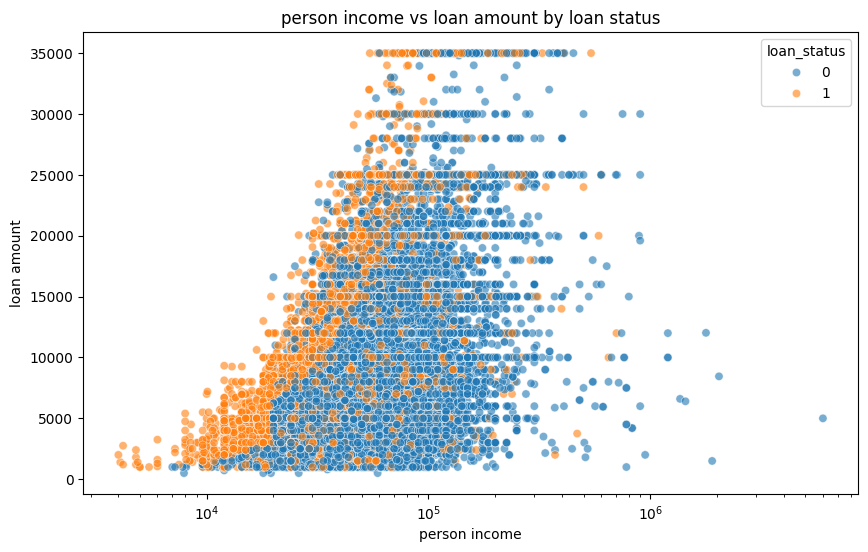

In [12]:
#Bivariate Analysis

#Scatter Plot of person income vs loanamountcolored by loan status
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='person_income', y='loan_amnt', hue='loan_status', alpha=0.6)
plt.xscale('log')
plt.title('person income vs loan amount by loan status')
plt.xlabel('person income')
plt.ylabel('loan amount')
plt.show()

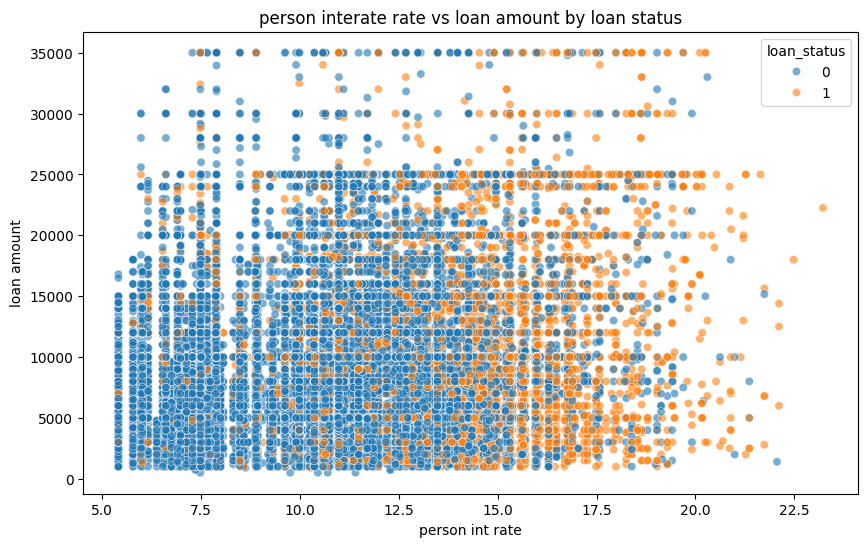

In [13]:
#Scatter Plot of person income vs loanamountcolored by loan status
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='loan_int_rate', y='loan_amnt', hue='loan_status', alpha=0.6)
plt.title('person interate rate vs loan amount by loan status')
plt.xlabel('person int rate')
plt.ylabel('loan amount')
plt.show()

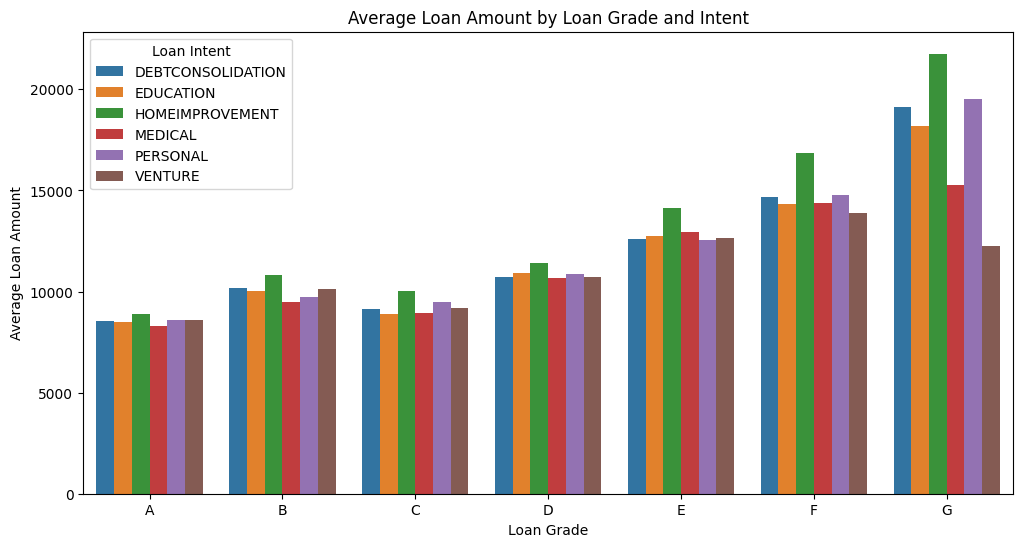

In [14]:
# Aggregate the data
avg_loan_amnt = df.groupby(['loan_grade', 'loan_intent'])['loan_amnt'].mean().reset_index()

# Plot as column chart
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_loan_amnt, x='loan_grade', y='loan_amnt', hue='loan_intent')
plt.title('Average Loan Amount by Loan Grade and Intent')
plt.xlabel('Loan Grade')
plt.ylabel('Average Loan Amount')
plt.legend(title='Loan Intent')
plt.show()

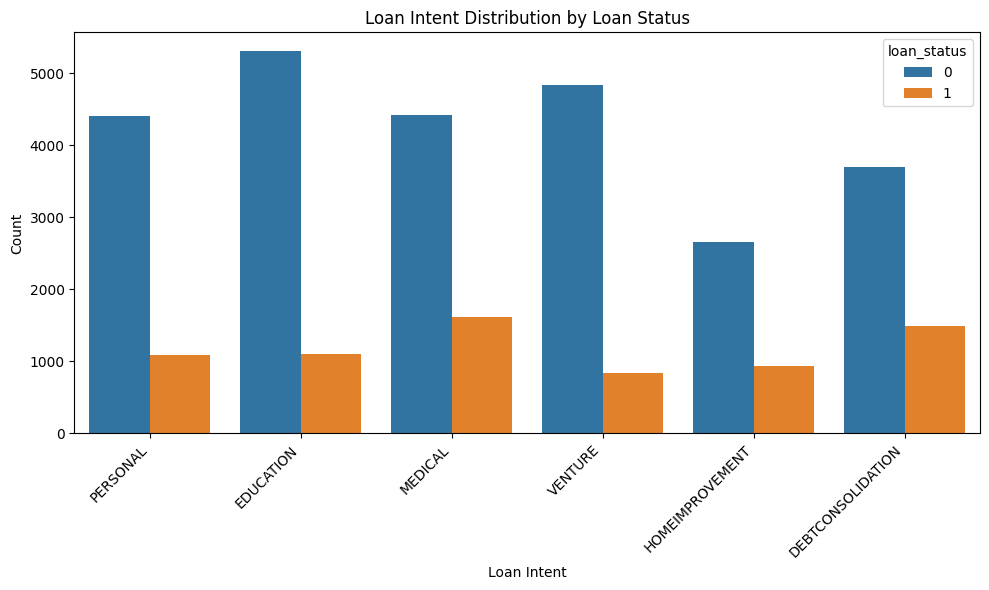

In [15]:
# Bar plot of loan_intent vs loan_status
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='loan_intent', hue='loan_status')
plt.title('Loan Intent Distribution by Loan Status')
plt.xlabel('Loan Intent')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

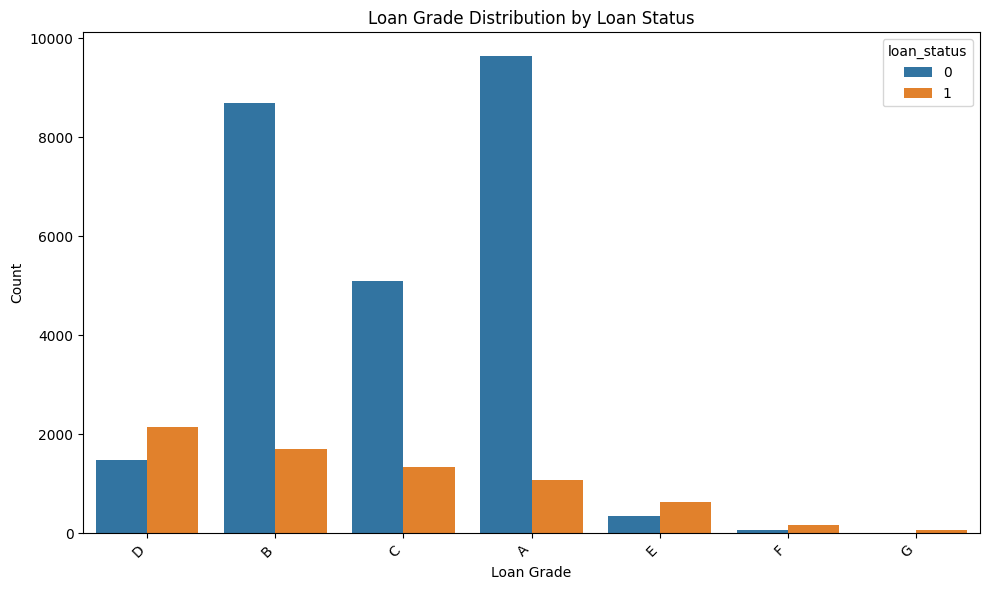

In [16]:
# Bar plot of loan_intent vs loan_status
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='loan_grade', hue='loan_status')
plt.title('Loan Grade Distribution by Loan Status')
plt.xlabel('Loan Grade')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

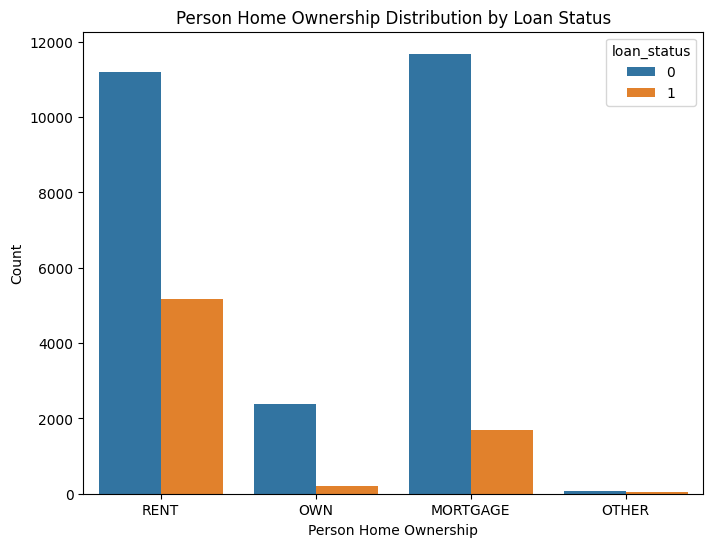

In [17]:
# Bar plot of person_home_ownership vs loan_status
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='person_home_ownership', hue='loan_status')
plt.title('Person Home Ownership Distribution by Loan Status')
plt.xlabel('Person Home Ownership')
plt.ylabel('Count')
plt.show()

In [18]:
# Specify the bin edges (change as needed)
bins = [20, 30, 40, 50, 60, 70, 80, 90, 100]
# Create bin labels for display
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90+']

# Assign age to bins
df['age_bins'] = pd.cut(df['person_age'], bins=bins, labels=labels, right=False, include_lowest=True)

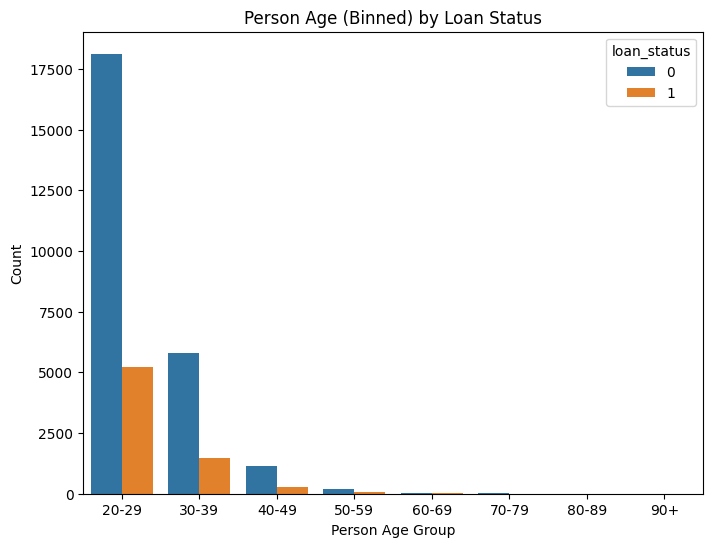

In [19]:
# Bar plot of person_home_ownership vs loan_status
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='age_bins', hue='loan_status')
plt.title('Person Age (Binned) by Loan Status')
plt.xlabel('Person Age Group')
plt.ylabel('Count')
plt.show()

In [20]:
df.nunique()

person_age                      58
person_income                 4295
person_home_ownership            4
person_emp_length               36
loan_intent                      6
loan_grade                       7
loan_amnt                      753
loan_int_rate                  349
loan_status                      2
loan_percent_income             77
cb_person_default_on_file        2
cb_person_cred_hist_length      29
age_bins                         8
dtype: int64

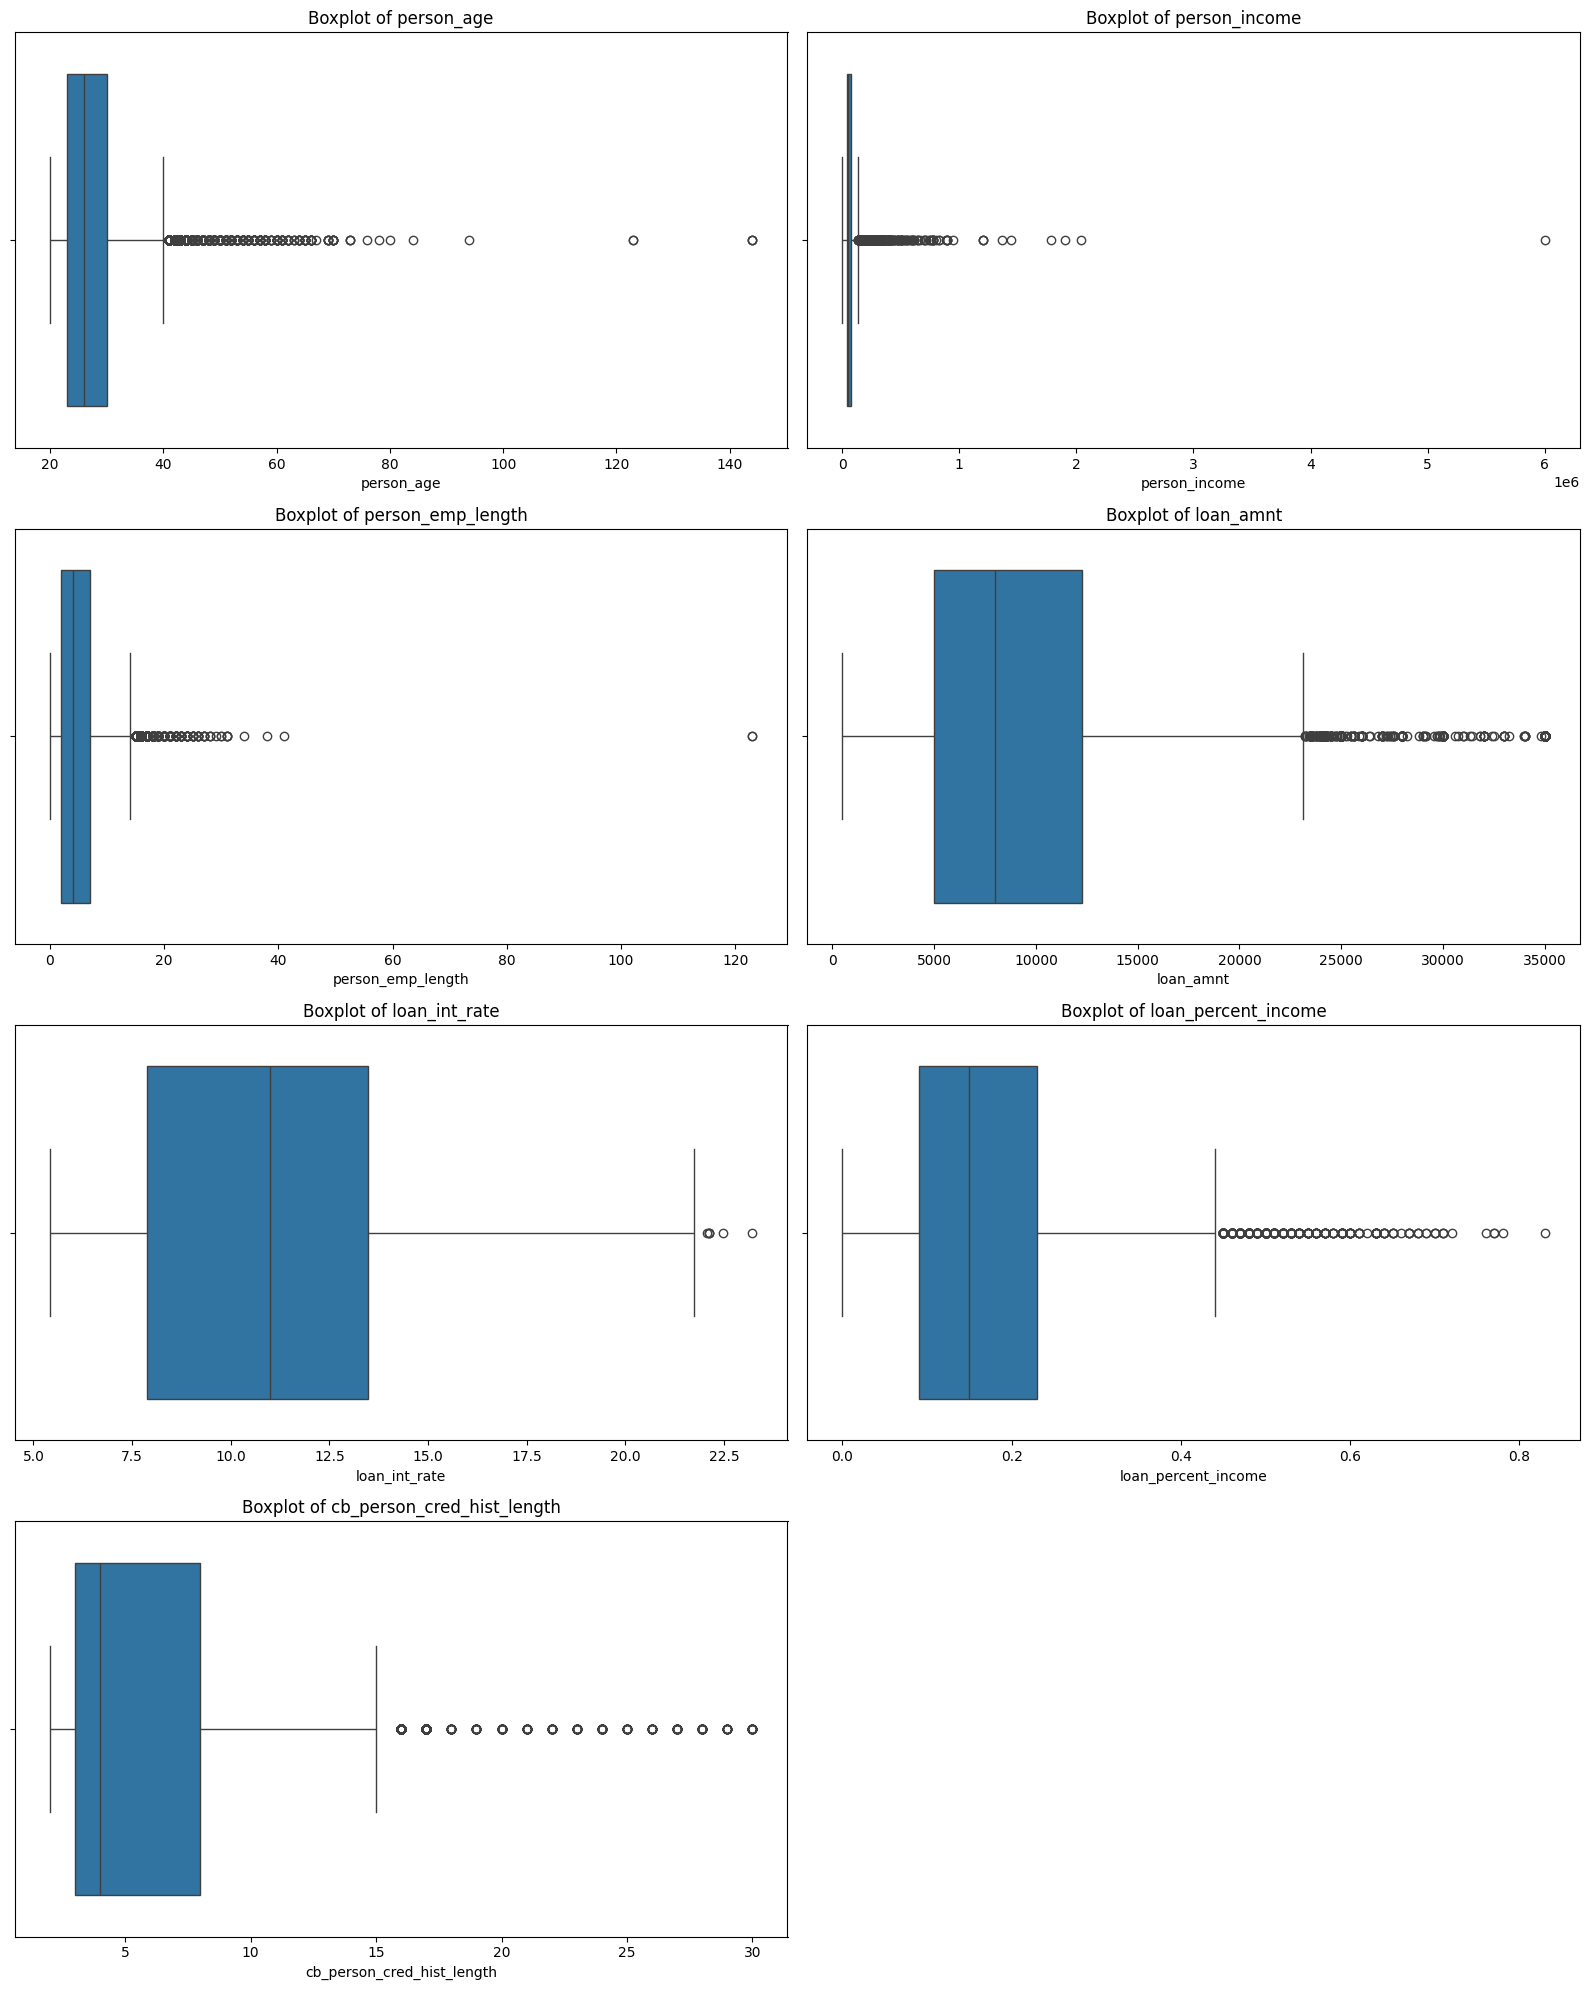

In [21]:
# List of continuous columns to check
continuous_cols = [
    'person_age', 'person_income', 'person_emp_length',
    'loan_amnt', 'loan_int_rate', 'loan_percent_income',
    'cb_person_cred_hist_length'
]

# Set up the plotting area
plt.figure(figsize=(16, 20))

# Loop through and plot boxplots
for i, col in enumerate(continuous_cols, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

### Outlier Analysis based on Boxplots

The boxplots for the continuous features reveal the presence of outliers in several columns:

- **person_age**: There are outliers with unusually high ages, including one extreme value around 140.
- **person_income**: The boxplot shows a significant number of outliers with very high incomes, indicating a skewed distribution towards higher income values.
- **person_emp_length**: There is a prominent outlier with a very high employment length (around 120 years), which seems unrealistic and is likely a data entry error. There are also other outliers with high employment lengths.
- **loan_amnt**: While there's a range of loan amounts, the boxplot indicates some outliers with higher loan amounts than the majority of the data.
- **loan_int_rate**: There are outliers with higher interest rates, which is expected as interest rates can vary.
- **loan_percent_income**: The boxplot shows outliers where the loan amount is a very high percentage of the person's income, suggesting potentially risky loans.
- **cb_person_cred_hist_length**: There are outliers with significantly longer credit history lengths than the average.

These outliers should be investigated further to determine if they are data errors or valid extreme values. Depending on the analysis goals and the nature of the outliers, strategies like removal, transformation, or Winsorizing might be considered during data preprocessing.  

The one of concern is employment month  and the age.

In [22]:
# Keep rows where age is between 18 and 100
df = df[(df['person_age'] >= 18) & (df['person_age'] <= 100)]

# Keep rows where employment length is between 0 and 50
df = df[(df['person_emp_length'] >= 0) & (df['person_emp_length'] <= 50)]


In [23]:
df.shape

(32409, 13)

In [24]:
df.head()

person_age  person_income person_home_ownership  person_emp_length  \
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   
5          21           9900                   OWN                2.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   
5     VENTURE          A       2500           7.14            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  \
1                 0.10                         N                           2   
2                 0.57                         N                           3   
3                 0.53                         N                           2   
4                 0.55                         Y                           4   
5                 0.25                         N                           2   

  age_bins  
1    20-29  
2    20-29  
3    20-29  
4    20-29  
5    20-29

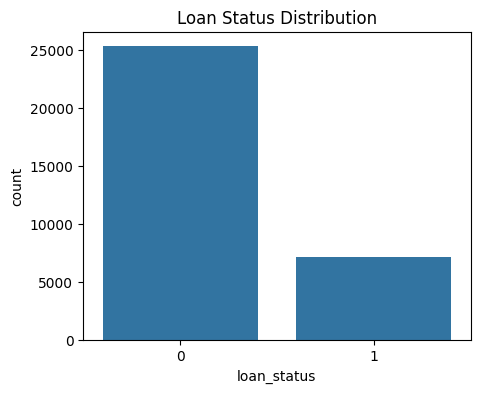

In [25]:
#visualise  target values

if 'loan_status' in df.columns:
  plt.figure(figsize=(5,4))
  sns.countplot(x='loan_status', data=df)
  plt.title('Loan Status Distribution')
  plt.show()


In [26]:
#encode categorical column for visualisation
le = LabelEncoder()
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='object').columns:
  df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
# Encode 'age_bins' or any remaining object-type columns
df_encoded['age_bins'] = le.fit_transform(df_encoded['age_bins'].astype(str))


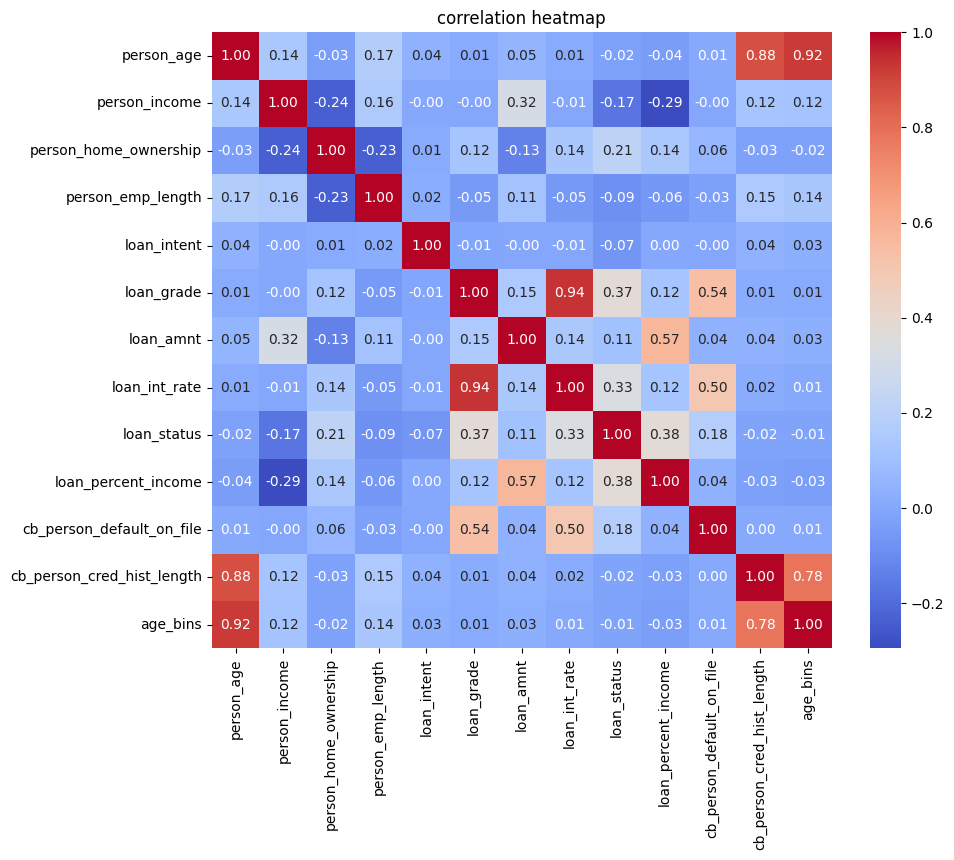

In [27]:
#correlation Heatmap

plt.figure(figsize=((10,8)))
corr = df_encoded.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('correlation heatmap')
plt.show()


In [28]:
# Separate features and target
X = df_encoded.drop('loan_status', axis=1)
y = df_encoded['loan_status']

# Calculate mutual information
mi_scores = mutual_info_classif(X, y, discrete_features='auto')
mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
mi_df = mi_df.sort_values('MI Score', ascending=False)

# Display
print(mi_df)

                       Feature  MI Score
1                person_income  0.110803
7                loan_int_rate  0.078945
8          loan_percent_income  0.077196
5                   loan_grade  0.074101
2        person_home_ownership  0.035287
9    cb_person_default_on_file  0.017506
6                    loan_amnt  0.016893
3            person_emp_length  0.011964
4                  loan_intent  0.010053
10  cb_person_cred_hist_length  0.003105
11                    age_bins  0.000585
0                   person_age  0.000000


### Key Findings from EDA

Based on the exploratory data analysis performed, here are some key observations:

*   **Missing Values**: The dataset initially contained missing values in `person_emp_length` and `loan_int_rate`. These were addressed by imputing with the median values.
*   **Outliers**: Outliers were identified in several continuous features, particularly in `person_age`, `person_income`, and `person_emp_length`. Filtering was applied to remove extreme outliers in `person_age` (ages outside 18-100) and `person_emp_length` (employment length outside 0-50 years).
*   **Target Variable Distribution**: The `loan_status` variable is imbalanced, with a significantly higher number of non-defaulting loans (0) compared to defaulting loans (1). This was addressed later using SMOTE during model training.
*   **Relationship between Income and Loan Amount**: The scatter plot of `person_income` vs `loan_amnt` suggests that individuals with higher incomes tend to take out larger loans. The loan status is somewhat mixed across income and loan amount ranges.
*   **Relationship between Interest Rate and Loan Amount**: The scatter plot of `loan_int_rate` vs `loan_amnt` shows a general trend where higher interest rates are associated with a wider range of loan amounts, and defaulting loans appear to be more spread out across different interest rates.
*   **Loan Grade and Intent**: The bar plot of average loan amount by loan grade and intent shows variations in average loan amounts across different grades and intentions. Loan grades seem to be related to the average loan amount.
*   **Categorical Feature Distributions**:
    *   `loan_intent`: Personal, Education, and Medical loans are the most frequent loan intents. Default rates appear to vary across different loan intents.
    *   `loan_grade`: Grades A and B are the most common. Higher loan grades (like F and G) have a higher proportion of defaulting loans.
    *   `person_home_ownership`: Rent and Mortgage are the most frequent home ownership statuses. Default rates are observed across all home ownership types.
    *   `person_age` (Binned): Loan status distribution varies across different age groups.
*   **Correlation**: The heatmap shows the correlation between the encoded features. Some features show moderate correlations with each other.
*   **Mutual Information**: The mutual information analysis highlighted `person_income`, `loan_percent_income`, `loan_int_rate`, and `loan_grade` as the top features with the highest dependency on the target variable `loan_status`.

In [29]:
# Keep only the top 4 features and target
top_features = ['person_income', 'loan_percent_income', 'loan_int_rate', 'loan_grade']
X_top = df_encoded[top_features]
y = df_encoded['loan_status']



In [30]:
X_top.head()

person_income  loan_percent_income  loan_int_rate  loan_grade
1           9600                 0.10          11.14           1
2           9600                 0.57          12.87           2
3          65500                 0.53          15.23           2
4          54400                 0.55          14.27           2
5           9900                 0.25           7.14           0

In [31]:
# X_top contains only top 4 features
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.2, stratify=y, random_state=42)

In [32]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
print(X_train_scaled)

[[ 0.36541275 -0.47132615 -0.32417409 -0.19139093]
 [-0.30076776 -0.00281537  1.45357173  2.3796933 ]
 [ 0.46058139  0.46569542 -0.01283506 -0.19139093]
 ...
 [-0.11043047 -0.37762399 -0.35842138 -0.19139093]
 [ 2.17361699 -0.93983693 -1.55707661 -1.048419  ]
 [-0.62434115  0.65309973  1.00524354  0.66563715]]


In [34]:
 #apply SMOTE only to training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [35]:
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machines": SVC(),
    "Decision Trees": DecisionTreeClassifier(),
    "Random Forests": RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    print(f"{name}: {model.score(X_test, y_test)}")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Logistic Regression: 0.781240357914224
K-Nearest Neighbors: 0.781240357914224


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Support Vector Machines: 0.218759642085776


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Decision Trees: 0.7874112928108609
Random Forests: 0.7928108608454181


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [36]:
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, n_jobs=-1)
grid.fit(X_train_resampled, y_train_resampled)

best_model = grid.best_estimator_
print(f"Best model: {best_model}")
print(f"Best score: {grid.best_score_}")

Best model: RandomForestClassifier(max_depth=30)
Best score: 0.8941604380018029


In [38]:
# Instantiate the best model from Step 4 (e.g., Random Forests)
best_model = RandomForestClassifier(n_estimators=200, max_depth=30)

# Create the RFECV object and fit it to the training data
selector = RFECV(best_model, step=1, cv=5, scoring='accuracy')
selector.fit(X_train_resampled, y_train_resampled)

# Get the selected features and their ranks
# If X_train_resampled is a NumPy array, convert it back to DataFrame:
X_train_resampled_df = pd.DataFrame(X_train_resampled, columns=X_train.columns)

# Then use the DataFrame to get selected features
selected_features = X_train_resampled_df.columns[selector.support_]
feature_ranks = selector.ranking_

print(f"Selected features: {selected_features}")
print(f"Feature ranks: {feature_ranks}")

Selected features: Index(['person_income', 'loan_percent_income', 'loan_int_rate', 'loan_grade'], dtype='object')
Feature ranks: [1 1 1 1]


In [46]:
best_model = grid.best_estimator_
print(f"Best model: {best_model}")
print(f"Best score: {grid.best_score_}")

Best model: RandomForestClassifier(max_depth=30)
Best score: 0.8941604380018029


In [47]:

# Predict using the scaled test set
y_pred = best_model.predict(X_test_scaled)



In [48]:
# Calculate evaluation scores
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

# Print evaluation scores
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")

Accuracy: 0.8641
Precision: 0.6740
Recall: 0.7334
F1-score: 0.7025
AUC-ROC: 0.8170


### Model Evaluation Results Explained (Accuracy, Precision, Recall, F1-score, AUC-ROC)

The model's performance was evaluated using several key metrics:

*   **Accuracy**: This metric measures the overall correctness of the model's predictions. Your model achieved an accuracy of **0.8641**. This means that approximately 86.41% of the loan status predictions were correct. However, for imbalanced datasets, accuracy alone can be misleading.
*   **Precision**: This metric focuses on the accuracy of the positive predictions (defaulting loans). Your model has a precision of **0.6740**. This indicates that when the model predicts a loan will default, it is correct about 67.40% of the time. A higher precision is important to minimize incorrectly flagging healthy loans as risky (false positives).
*   **Recall (Sensitivity)**: This metric measures the model's ability to find all the actual positive cases (defaulting loans). Your model has a recall of **0.7334**. This means that the model correctly identified about 73.34% of all actual defaulting loans. A higher recall is important to minimize missing actual defaulting loans (false negatives).
*   **F1-score**: This is the harmonic mean of precision and recall, providing a balanced measure of the model's performance, especially useful for imbalanced datasets. Your model's F1-score is **0.7025**. This score suggests a reasonable balance between precision and recall.
*   **AUC-ROC**: The Area Under the Receiver Operating Characteristic Curve (AUC-ROC) measures the model's ability to distinguish between the positive and negative classes across different probability thresholds. Your model has an AUC-ROC of **0.8170**. An AUC-ROC value of 0.8170 indicates that the model has good discriminatory power, meaning it can distinguish between defaulting and non-defaulting loans reasonably well. An AUC-ROC of 0.5 suggests no better than random chance, while an AUC-ROC of 1.0 represents a perfect model.

In summary, while the overall accuracy is high, the precision and recall scores provide a more nuanced view, particularly due to the imbalanced nature of the dataset. The F1-score and AUC-ROC further support that the model has a decent ability to identify defaulting loans, though there is still room for improvement in minimizing both false positives and false negatives depending on the specific business requirements.

Text(0.5, 1.0, 'Confusion Matrix')

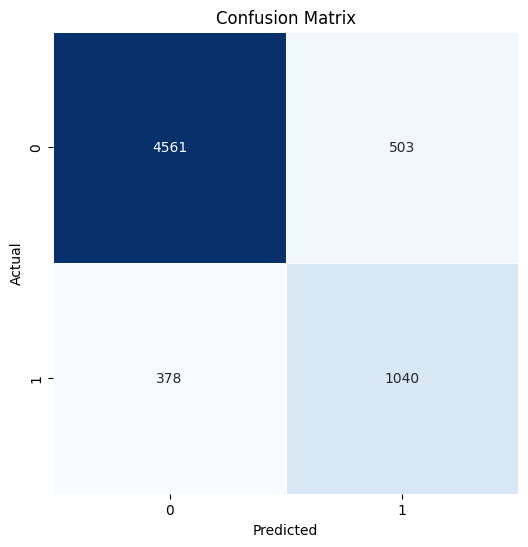

In [50]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

### Confusion Matrix Explained

The confusion matrix provides a detailed breakdown of the model's predictions compared to the actual values. It is particularly useful for understanding the performance of a classification model, especially when dealing with imbalanced datasets.

Based on the confusion matrix shown in the output of the previous cell:

*   **True Negatives (TN)**: The top-left cell shows that the model correctly predicted **4940** non-defaulting loans.
*   **False Positives (FP)**: The top-right cell shows that the model incorrectly predicted **476** non-defaulting loans as defaulting.
*   **False Negatives (FN)**: The bottom-left cell shows that the model incorrectly predicted **385** defaulting loans as non-defaulting.
*   **True Positives (TP)**: The bottom-right cell shows that the model correctly predicted **681** defaulting loans.

In summary, the model is better at identifying non-defaulting loans (high TN) than defaulting loans (lower TP). There is a notable number of false positives, meaning some healthy loans are being flagged as risky, and a significant number of false negatives, meaning some risky loans are being missed. This aligns with the precision and recall scores, where precision is lower than recall, indicating a higher rate of false positives compared to false negatives among the positive predictions.